#Indices Calculations



**We begin by importing relevant packages**

In [46]:

#operational packages
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/gdrive


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading Data into Google Colab

***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

If you want to do instrument offset correction, you can do them before uploading the excel sheet. Also,before uploading the data, make sure to remove the bands with atmospheric noise. I have a seperate code the corrects the instrument offset

In [48]:
#We extracted the reflectance of a single pixel for each waypoint of our field sites
Sentinel_Spectra = pd.ExcelFile('/content/drive/MyDrive/tillage/April_26_2023_pixels.xlsx')
spectra = pd.read_excel(Sentinel_Spectra, 'Sites')

In [49]:
#This is the sentinel 2 scalling factor
sentinel = pd.read_csv('/content/drive/MyDrive/tillage/sentinel.csv')
sentinel

,SR_WL,S2A_SR_AV_B1,S2A_SR_AV_B2,S2A_SR_AV_B3,S2A_SR_AV_B4,S2A_SR_AV_B5,S2A_SR_AV_B6,S2A_SR_AV_B7,S2A_SR_AV_B8,S2A_SR_AV_B8A,...,S2A_SR_AV_B11,S2A_SR_AV_B12,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,351.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,2477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,2478.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,2479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
spectra

,Channel,Site 1,Site 2,Site 3,Site 4,Site 5
0,1,0.2058,0.2180,0.2273,0.2109,0.2215
1,2,0.2334,0.2466,0.2448,0.2456,0.2458
2,3,0.2476,0.2704,0.2632,0.2642,0.2712
3,4,0.2794,0.3132,0.3078,0.3056,0.3120
4,5,0.2998,0.3396,0.3317,0.3306,0.3418
5,6,0.3184,0.3547,0.3517,0.3502,0.3597
6,7,0.3410,0.3748,0.3719,0.3782,0.3837
7,8,0.3657,0.4045,0.4008,0.4038,0.4132
8,9,0.3618,0.4036,0.3990,0.4003,0.4088
9,10,0.4024,0.4243,0.4010,0.4663,0.4107


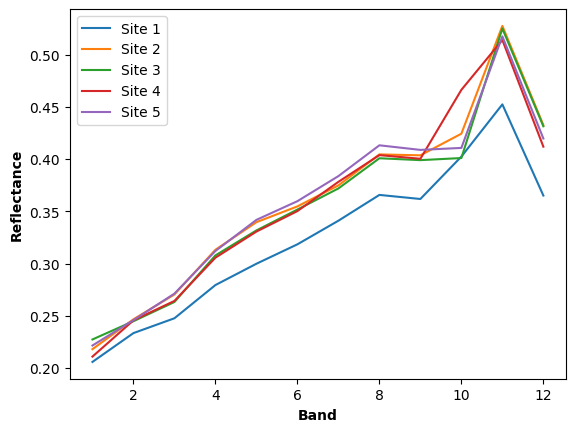

In [26]:
#plotting the sentinel 2 spectra for one pixel waypoint
plt.plot(spectra['Channel'],spectra['Site 1'])
plt.plot(spectra['Channel'],spectra['Site 2'])
plt.plot(spectra['Channel'],spectra['Site 3'])
plt.plot(spectra["Channel"],spectra['Site 4'])
plt.plot(spectra['Channel'],spectra['Site 5'])
plt.xlabel('Band', weight = "bold")
plt.ylabel("Reflectance", weight = "bold")
plt.legend(labels =['Site 1', 'Site 2', 'Site 3', 'Site 4', 'Site 5'])

In [27]:
# We import each work book, and select the individual worksheet. Make sure your excel file is uploaded onto google drive
#Make sure to copy the right file path from the left dropdown menu
#LynnW = pd.ExcelFile('/content/gdrive/MyDrive/Spring_2023_Field_Data_Processing/New_10D_spring_2023/042623_HWHF_10d_new.xlsx')
LynnW = pd.ExcelFile('/content/drive/MyDrive/Field_Reflectance_Preprocessed/Corrected_Spring24_Data/offset_atm_corrected_04262023.xlsx')

LynnW05_CornRes = pd.read_excel(LynnW,'Lynn05CornRes')
LynnW05_Soil = pd.read_excel(LynnW, 'Lynn05_BareSoil')
LynnW04_CornRes = pd.read_excel(LynnW, 'Lynn04CornRes')
LynnW04_Soil = pd.read_excel(LynnW, 'Lynn04BareSoil')
LynnW03_CornRes = pd.read_excel(LynnW, 'LynnW03_CornRes')
LynnW03_Soil = pd.read_excel(LynnW, 'LynnW03_BareSoil')
LynnW02_CornRes = pd.read_excel(LynnW, 'LynnW02_CornRes')
LynnW02_Soil = pd.read_excel(LynnW, 'LynnW02_BareSoil')
LynnW01_CornRes = pd.read_excel(LynnW, 'LynnW01_CornRes')
LynnW01_Soil = pd.read_excel(LynnW, 'LynnW01_BareSoil')

#Computing Mean Reflectance

This function calculates the mean avaerage reflectance

In [8]:
def mean_reflectance (sample):
  sample["Mean Reflectance"] = sample.drop('Wavelength', axis=1).mean(axis=1)
  return sample["Mean Reflectance"]

In [12]:
LynnW_05_CornRes = mean_reflectance(LynnW05_CornRes)
LynnW_05_Soil= mean_reflectance (LynnW05_Soil)
LynnW_04_CornRes = mean_reflectance (LynnW04_CornRes)
LynnW_04_Soil= mean_reflectance(LynnW04_Soil)
LynnW_03_CornRes = mean_reflectance(LynnW03_CornRes)
LynnW_03_Soil= mean_reflectance(LynnW03_Soil)
LynnW_02_CornRes = mean_reflectance(LynnW02_CornRes)
LynnW_02_Soil = mean_reflectance(LynnW02_Soil)
LynnW_01_CornRes= mean_reflectance(LynnW01_CornRes)
LynnW_01_Soil = mean_reflectance(LynnW01_Soil)



Text(0, 0.5, 'Refectance')

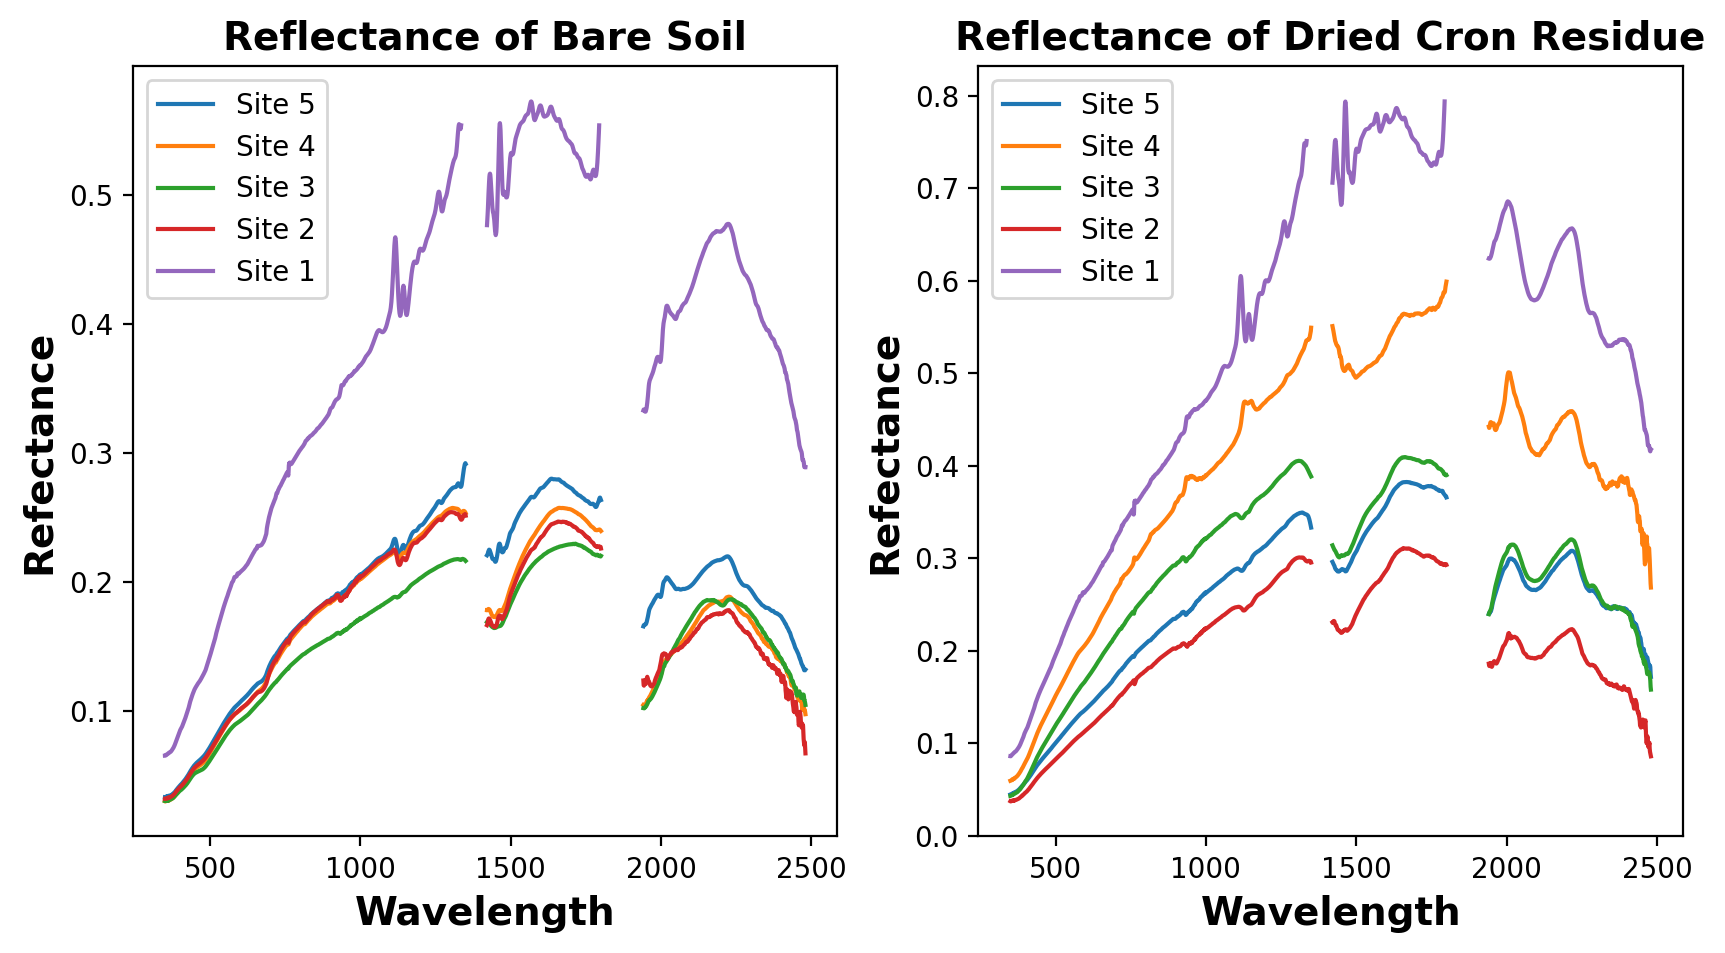

In [28]:
#Plotting mean reflectance for each site
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(1,2 , figsize= (10,5))
ax[0].plot(LynnW05_Soil["Wavelength"], LynnW_05_Soil)
ax[0].plot(LynnW05_Soil["Wavelength"], LynnW_04_Soil)
ax[0].plot(LynnW05_Soil["Wavelength"], LynnW_03_Soil)
ax[0].plot(LynnW05_Soil["Wavelength"], LynnW_02_Soil)
ax[0].plot(LynnW05_Soil["Wavelength"], LynnW_01_Soil)

ax[0].legend(labels = ['Site 5', 'Site 4', 'Site 3', 'Site 2', 'Site 1'], fontsize = '10')
ax[0].set_title ('Reflectance of Bare Soil', fontsize = '14', weight="bold")
ax[0].set_xlabel("Wavelength", fontsize = '14', weight="bold")
ax[0].set_ylabel("Refectance", fontsize = '14',weight="bold")
ax[1].plot(LynnW05_CornRes["Wavelength"], LynnW_05_CornRes)
ax[1].plot(LynnW05_CornRes["Wavelength"], LynnW_04_CornRes)
ax[1].plot(LynnW05_CornRes["Wavelength"], LynnW_03_CornRes)
ax[1].plot(LynnW05_CornRes["Wavelength"], LynnW_02_CornRes)
ax[1].plot(LynnW05_CornRes["Wavelength"], LynnW_01_CornRes)
ax[1].legend(labels = ['Site 5', 'Site 4', 'Site 3', 'Site 2', 'Site 1'], fontsize = '10')
ax[1].set_title ('Reflectance of Dried Cron Residue',fontsize = '14', weight="bold")
ax[1].set_xlabel("Wavelength", fontsize = '14', weight="bold")
ax[1].set_ylabel("Refectance", fontsize = '14', weight="bold")

#We want to convert our field spectra to sentinel 2 scale

In [50]:
 #This function converts the sentinel bands int sentinel 2 spectral bands
 def band(sample):
  sample_mean = sample.drop('Wavelength', axis=1).mean(axis=1)
  B_1  = sentinel['S2A_SR_AV_B1']* sample_mean
  B1 = B_1[B_1!=0 ].mean()
  B_2  = sentinel['S2A_SR_AV_B2']* sample_mean
  B2 = B_2[B_2!=0 ].mean()
  B_3  = sentinel['S2A_SR_AV_B3']* sample_mean
  B3 = B_3[B_3!=0 ].mean()
  B_4  = sentinel['S2A_SR_AV_B4']* sample_mean
  B4 = B_4[B_4!=0 ].mean()
  B_4  = sentinel['S2A_SR_AV_B4']* sample_mean
  B4 = B_4[B_4!=0 ].mean()
  B_5  = sentinel['S2A_SR_AV_B5']* sample_mean
  B5 = B_5[B_5!=0 ].mean()
  B_6  = sentinel['S2A_SR_AV_B6']* sample_mean
  B6 = B_6[B_6!=0 ].mean()
  B_7  = sentinel['S2A_SR_AV_B7']* sample_mean
  B7 = B_7[B_7!=0 ].mean()
  B_8  = sentinel['S2A_SR_AV_B8']* sample_mean
  B8 = B_8[B_8!=0 ].mean()
  B_9  = sentinel['S2A_SR_AV_B9']* sample_mean
  B9 = B_9[B_9!=0 ].mean()
  B_10  = sentinel['S2A_SR_AV_B10']* sample_mean
  B10 = B_10[B_10!=0 ].mean()
  B_11  = sentinel['S2A_SR_AV_B11']* sample_mean
  B11 = B_11[B_11!=0 ].mean()
  B_12  = sentinel['S2A_SR_AV_B12']* sample_mean
  B12 = B_12[B_12!=0 ].mean()
  scaled = [B1, B2,B3, B4, B5, B6, B7, B8, B9, B10, B11, B12]
  # scaled = pd.DataFrame({'B1': B1, 'B2': B2, 'B3': B3, 'B4': B4, 'B5': B5, 'B6': B6,
  #                'B7': B7, 'B8': B8, 'B9': B9, 'B10': B10, "B11":B11,
  #                'B12': B12})
  return scaled

In [51]:
Bands_LynnW5_Res = band (LynnW05_CornRes)
Bands_LynnW4_Res = band (LynnW04_CornRes)
Bands_LynnW3_Res = band (LynnW03_CornRes)
Bands_LynnW2_Res = band (LynnW02_CornRes)
Bands_LynnW1_Res = band (LynnW01_CornRes)


Bands_LynnW5_Soil = band (LynnW05_Soil)
Bands_LynnW4_Soil = band (LynnW04_Soil)
Bands_LynnW3_Soil = band (LynnW03_Soil)
Bands_LynnW2_Soil = band (LynnW02_Soil)
Bands_LynnW1_Soil = band (LynnW01_Soil)

In [52]:
Band_list = [1,2,3,4,5,6,7,8,9,10,11, 12]
LynnRes = pd.DataFrame({'Band': Band_list,
                      'Lynn1 Corn Residue': Bands_LynnW1_Res,
                      'Lynn2 Corn Residue':Bands_LynnW2_Res,
                      'Lynn3 Corn Residue': Bands_LynnW3_Res,
                      'Lynn4 Corn Residue': Bands_LynnW4_Res,
                      'Lynn5 Corn Residue': Bands_LynnW5_Res})
LynnSoil = pd.DataFrame({'Band': Band_list,
                      'Lynn1 Soil': Bands_LynnW1_Soil,
                      'Lynn2 Soil':Bands_LynnW2_Soil,
                      'Lynn3 Soil':Bands_LynnW3_Soil,
                      'Lynn4 Soil': Bands_LynnW4_Soil,
                      'Lynn5 Soil':Bands_LynnW5_Soil})

In [53]:
LynnRes

,Band,Lynn1 Corn Residue,Lynn2 Corn Residue,Lynn3 Corn Residue,Lynn4 Corn Residue,Lynn5 Corn Residue
0,1,0.059442,0.024980,0.034247,0.044483,0.030504
1,2,0.140704,0.059481,0.085495,0.108483,0.072210
2,3,0.163769,0.068681,0.100900,0.126877,0.083270
3,4,0.215491,0.096569,0.144390,0.176542,0.114631
4,5,0.217276,0.099165,0.146935,0.179928,0.117102
5,6,0.239404,0.111808,0.163279,0.198182,0.130879
6,7,0.219252,0.104105,0.151018,0.182849,0.121161
7,8,0.241113,0.115810,0.167676,0.203476,0.134328
8,9,0.321807,0.146571,0.212888,0.274257,0.171800
9,10,NaN,0.000081,0.000107,0.000148,0.000092


In [54]:
LynnSoil

,Band,Lynn1 Soil,Lynn2 Soil,Lynn3 Soil,Lynn4 Soil,Lynn5 Soil
0,1,0.044562,0.021418,0.019743,0.020903,0.022165
1,2,0.103615,0.050125,0.044976,0.049006,0.052317
2,3,0.128567,0.061828,0.056281,0.061620,0.064699
3,4,0.165418,0.083377,0.077566,0.084156,0.088575
4,5,0.172952,0.090021,0.080000,0.089213,0.093075
5,6,0.193195,0.103791,0.089471,0.101945,0.105238
6,7,0.177570,0.097166,0.083092,0.095832,0.097863
7,8,0.193314,0.107315,0.091195,0.106208,0.107790
8,9,0.250786,0.133342,0.114887,0.133644,0.136490
9,10,NaN,0.000069,0.000059,0.000069,0.000079


Text(0, 0.5, 'Refectance')

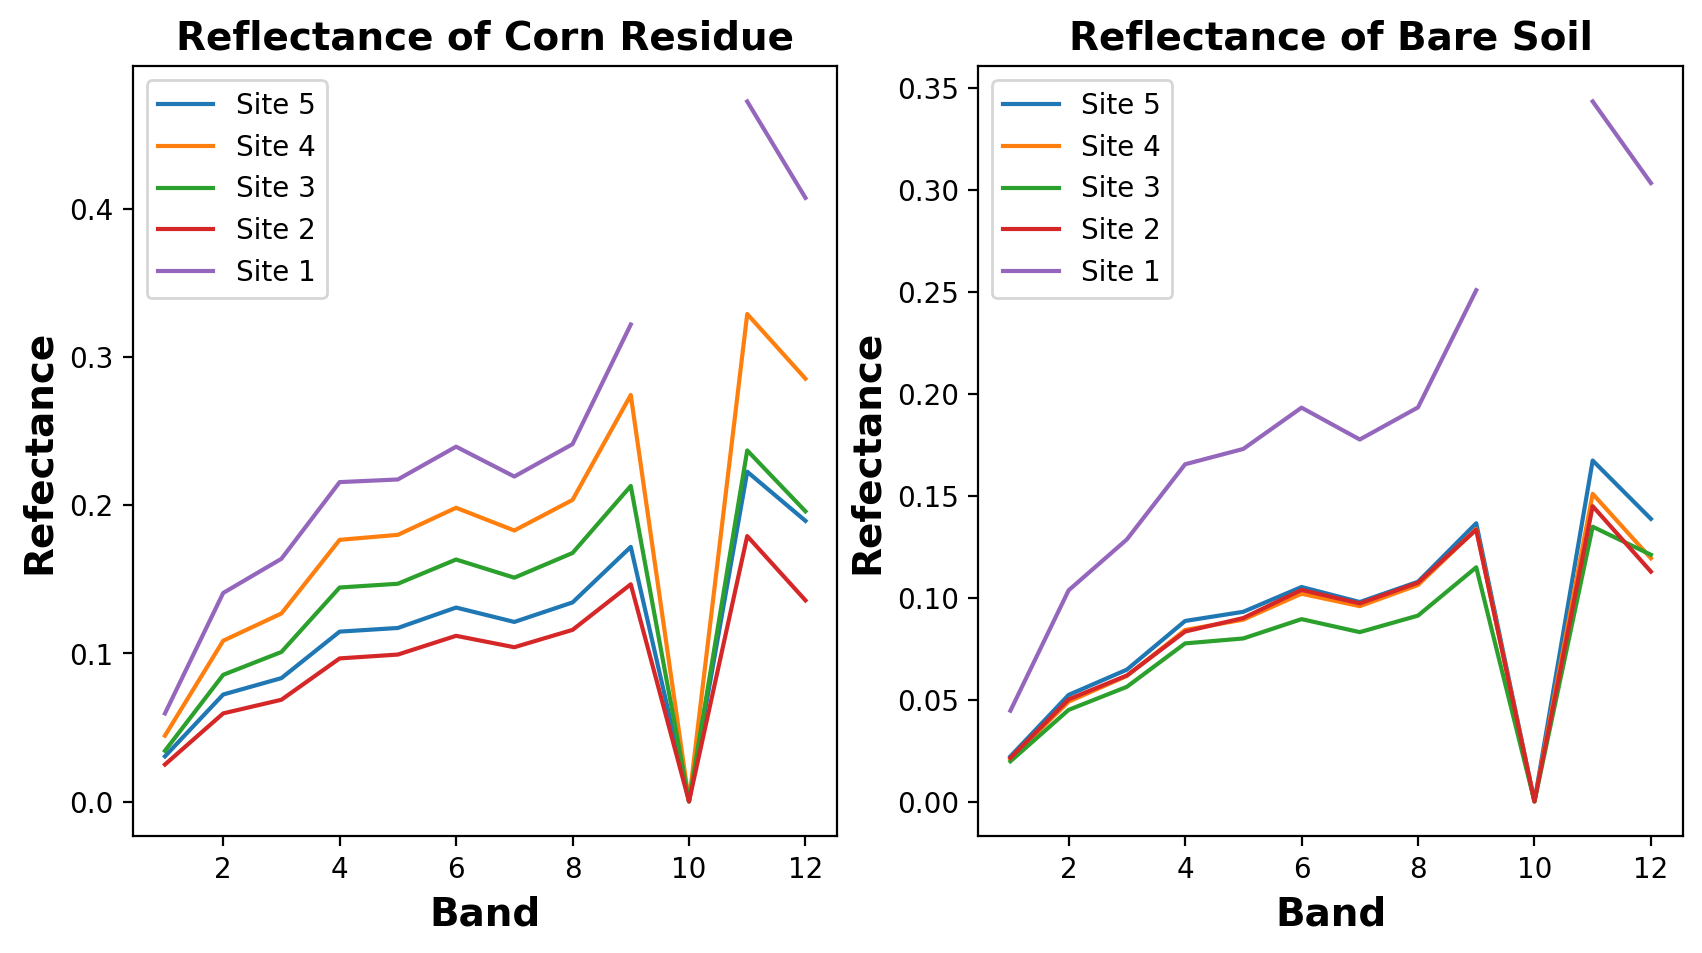

In [ ]:
#I am plotting the field data after upscalling to sentinel 2 channels
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(1,2 , figsize= (10,5))
ax[0].plot(LynnRes["Band"], LynnRes['Lynn5 Corn Residue'])
ax[0].plot(LynnRes["Band"], LynnRes['Lynn4 Corn Residue'])
ax[0].plot(LynnRes["Band"], LynnRes['Lynn3 Corn Residue'])
ax[0].plot(LynnRes["Band"], LynnRes['Lynn2 Corn Residue'])
ax[0].plot(LynnRes["Band"], LynnRes['Lynn1 Corn Residue'])
ax[0].legend(labels = ['Site 5', 'Site 4', 'Site 3', 'Site 2', 'Site 1'], fontsize = '10')
ax[0].set_title ('Reflectance of Corn Residue', fontsize = '14', weight="bold")
ax[0].set_xlabel("Band", fontsize = '14', weight="bold")
ax[0].set_ylabel("Refectance", fontsize = '14',weight="bold")

ax[1].plot(LynnSoil["Band"], LynnSoil["Lynn5 Soil"])
ax[1].plot(LynnSoil["Band"], LynnSoil["Lynn4 Soil"])
ax[1].plot(LynnSoil["Band"], LynnSoil["Lynn3 Soil"])
ax[1].plot(LynnSoil["Band"], LynnSoil["Lynn2 Soil"])
ax[1].plot(LynnSoil["Band"], LynnSoil["Lynn1 Soil"])
ax[1].legend(labels = ['Site 5', 'Site 4', 'Site 3', 'Site 2', 'Site 1'], fontsize = '10')
ax[1].set_title ('Reflectance of Bare Soil',fontsize = '14', weight="bold")
ax[1].set_xlabel("Band", fontsize = '14', weight="bold")
ax[1].set_ylabel("Refectance", fontsize = '14', weight="bold")

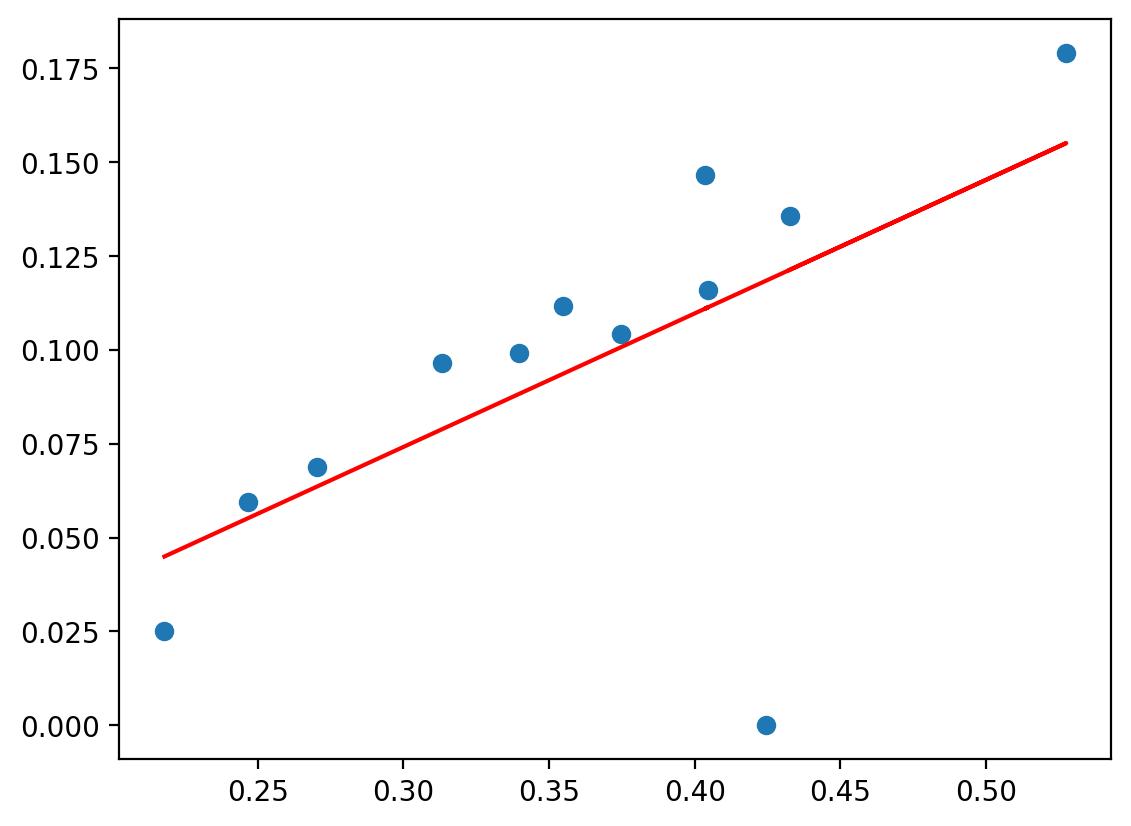

In [ ]:
from scipy.stats import linregress


plt.scatter(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])
slope, intercept, r_value, p_value, std_err = linregress(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])
plt.plot(spectra["Site 2"], intercept + slope*spectra["Site 2"], 'r', label='fitted line')
# text =
# plt.text(0.05, 0.95, text, transform=ax[1,0].transAxes,
#      fontsize=15, verticalalignment='top')
# #calculate equation for trendline
# z = np.polyfit(spectra["Site 1"], LynnRes['Lynn1 Corn Residue'], 1)
# p = np.poly1d(z)

# #add trendline to plot
# plt.plot(spectra["Site 1"], p(spectra["Site 1"]))
# plt.show()


Text(0.05, 0.95, 'R-Squared:0.38 p:0.03')

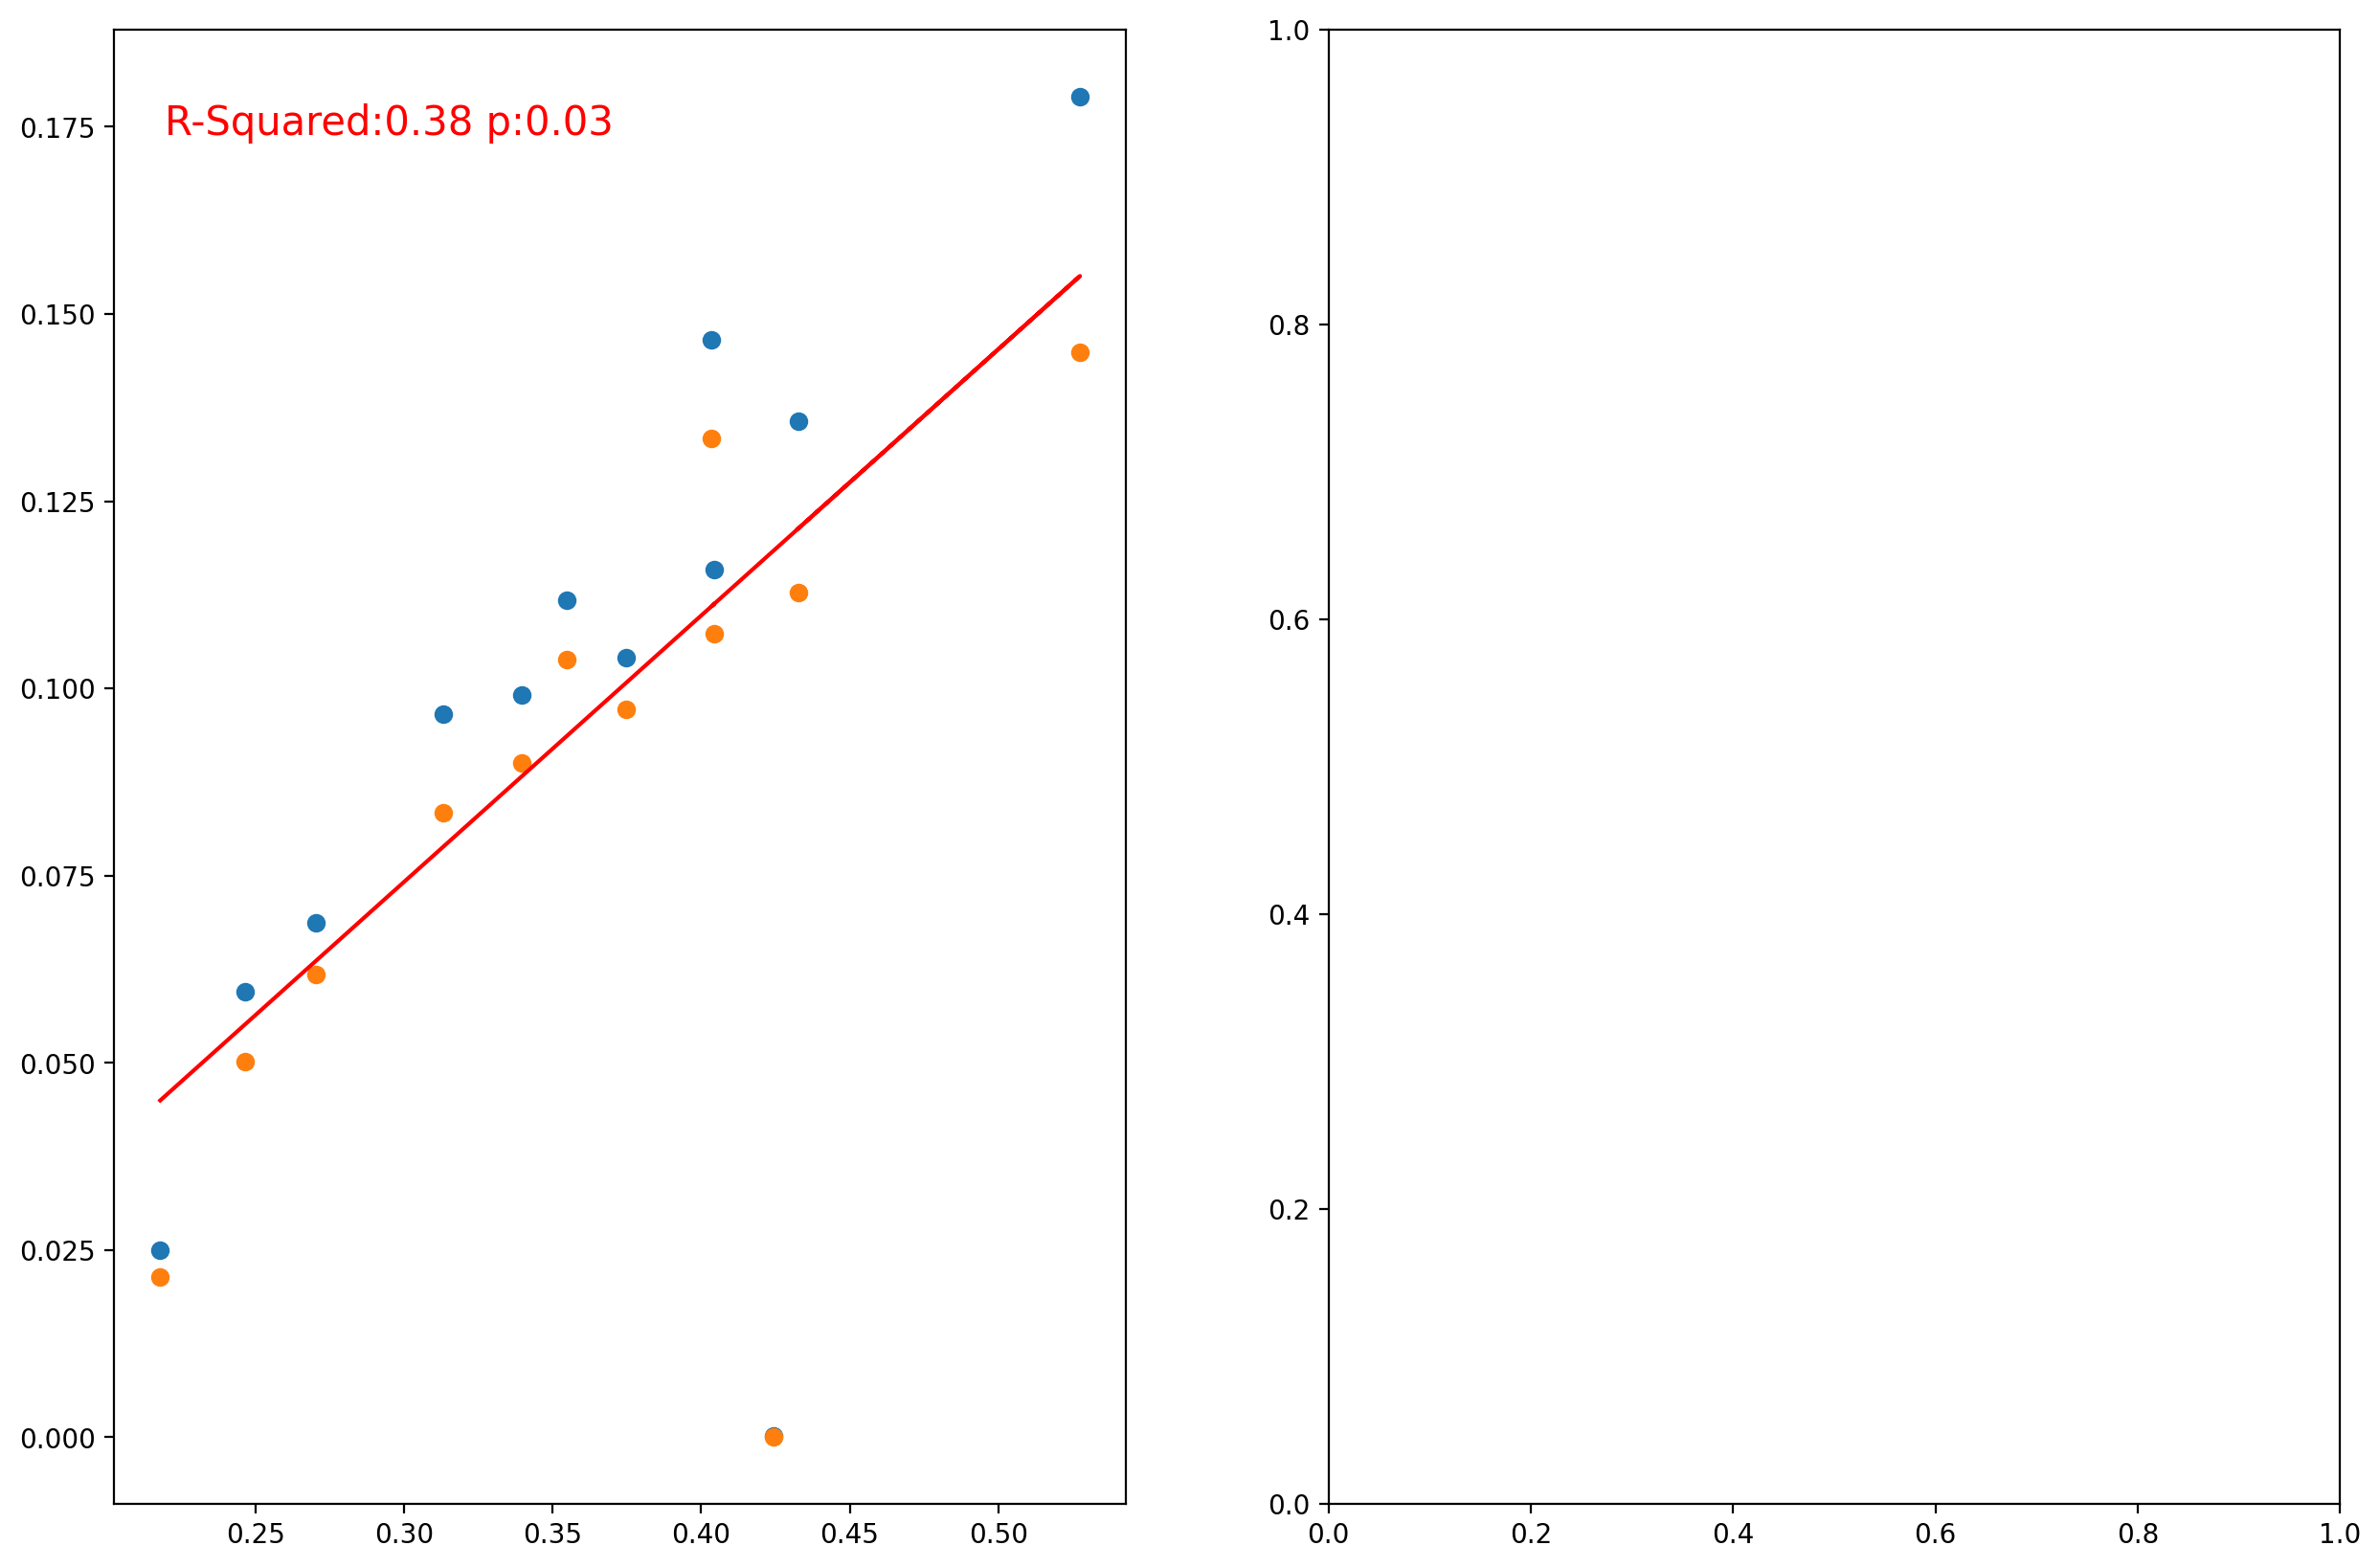

In [ ]:
fig, ax = plt.subplots(1,2 , figsize= (15,10))
ax[0].scatter(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])
ax[0].scatter(spectra["Site 2"], LynnSoil['Lynn2 Soil'])
site2conres = linregress(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])

ax[0].plot(spectra["Site 2"], site2conres.intercept + site2conres.slope*spectra["Site 2"], 'r', label='fitted line')

text1 = "R-Squared:" + str(round(site2conres.rvalue**2,2)) + " p:" + str(round(site2conres.pvalue,2))
ax[0].text(0.05, 0.95, text1, transform=ax[0].transAxes,
     fontsize=15, verticalalignment='top', color="red")



#slope, intercept, r_value, p_value, std_err = linregress(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])

AttributeError: module 'pandas' has no attribute 'plot'

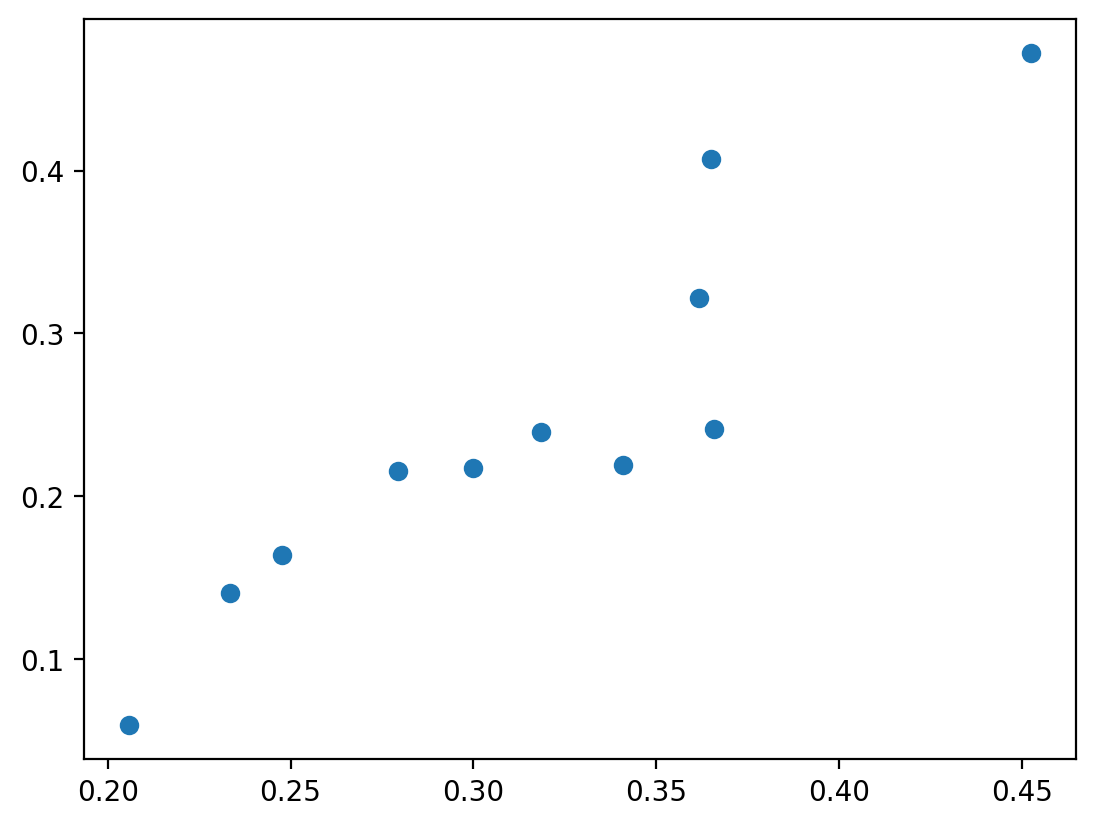

In [ ]:
%config InlineBackend.figure_format='retina'
from sklearn.metrics import r2_score

plt.scatter(spectra["Site 1"], LynnRes['Lynn1 Corn Residue'])
z = np.polyfit(spectra["Site 1"], LynnRes['Lynn1 Corn Residue'], 1)
p = np.poly1d(z)
plt.plot(spectra["Site 1"],p(spectra["Site 1"]))
text = "Corr: " + str(round (spectra["Site 3"].corr( LynnRes['Lynn3 Corn Residue']),3))

Text(0.05, 0.95, 'R^2: 0.43     p: 0.02')

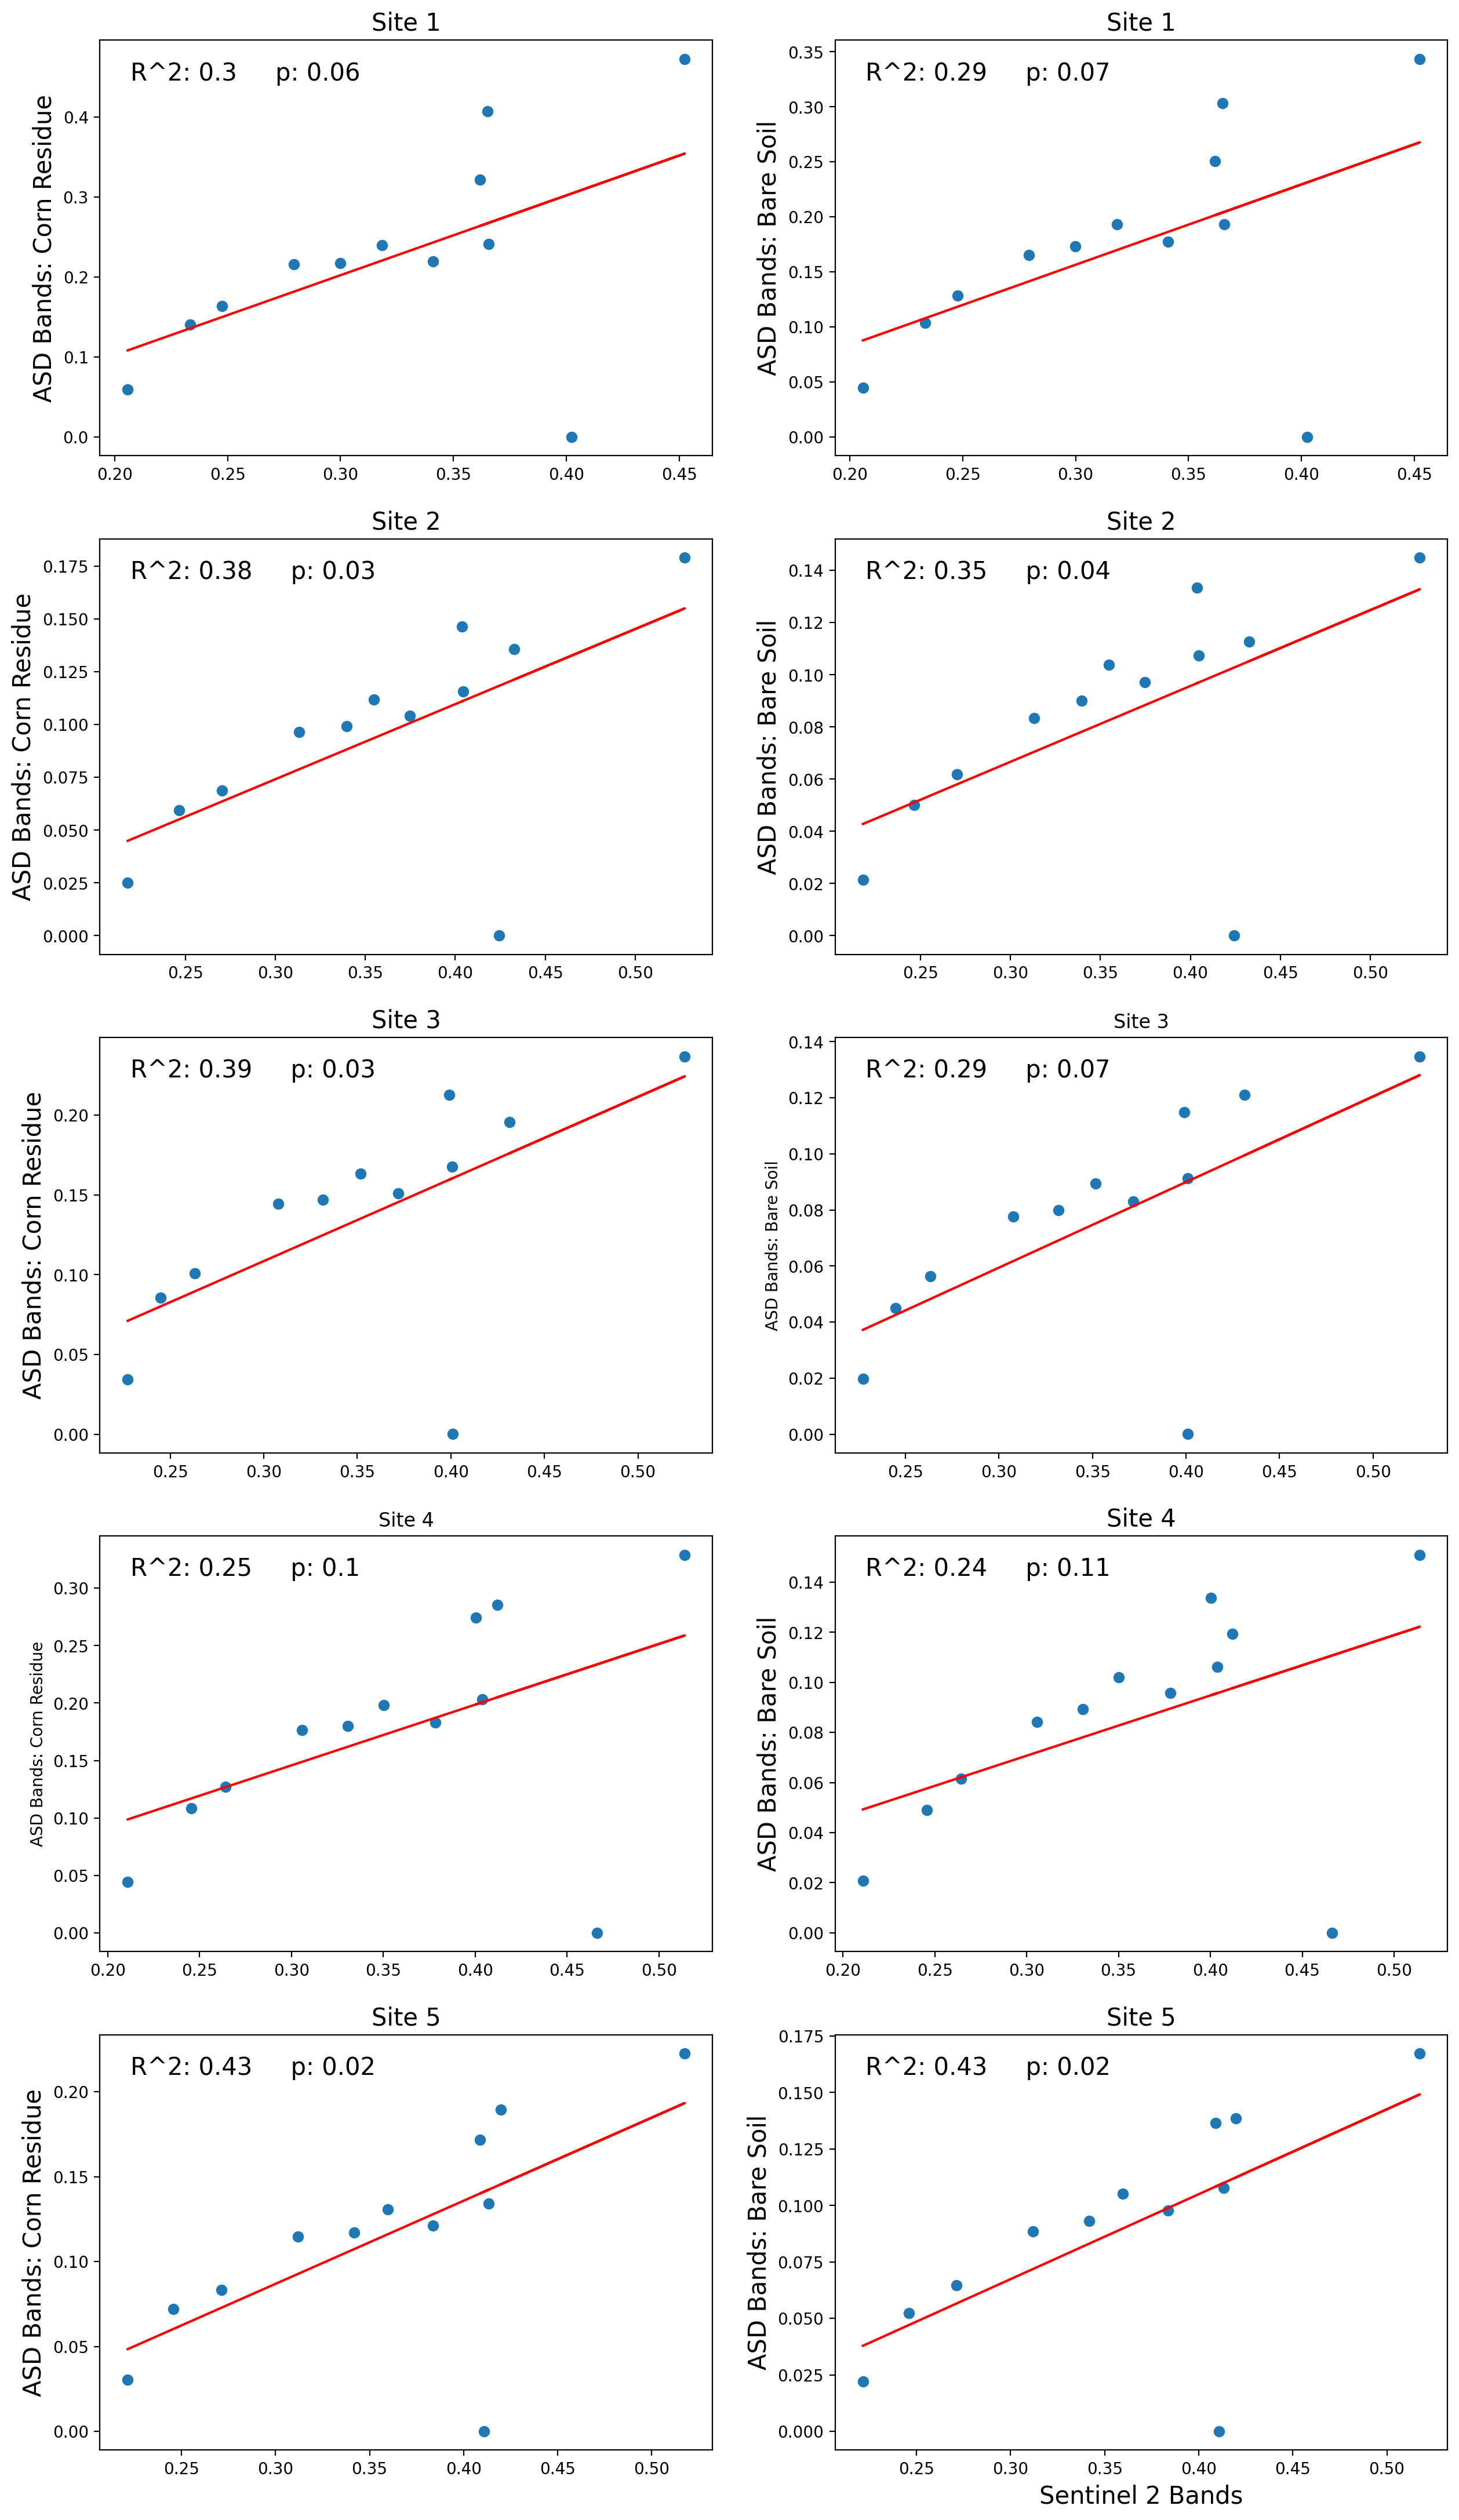

In [ ]:
#Regressing sentinel spectra with each of our field measurements
LynnRes['Lynn1 Corn Residue']=LynnRes['Lynn1 Corn Residue'].replace(np.nan, 0)
LynnSoil['Lynn1 Soil'] = LynnSoil['Lynn1 Soil'].replace(np.nan, 0)
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(5,2 , figsize= (15,27))
ax[0,0].scatter(spectra["Site 1"], LynnRes['Lynn1 Corn Residue'])

site1conres = linregress(spectra["Site 1"], LynnRes['Lynn1 Corn Residue'])

ax[0,0].plot(spectra["Site 1"], site1conres.intercept + site1conres.slope*spectra["Site 1"], 'r', label='fitted line')

text1 = "R^2: " + str(round(site1conres.rvalue**2,2)) + "     p: " + str(round(site1conres.pvalue,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=15, verticalalignment='top')
ax[0,0].set_ylabel('ASD Bands: Corn Residue',fontsize=15)
ax[0,0].set_title('Site 1',fontsize=15)

# text = "R-Squared" + str(r2_score(LynnRes['Lynn1 Corn Residue'],p1(spectra["Site 1"])))

# ax[0,0].text(0.05, 0.95, text, transform=ax[0,0].transAxes,
#      fontsize=15, verticalalignment='top')
# ax[0,0].set_ylabel('Reflectance of Corn Residue')
# ax[0,0].set_title('Site 1')
#  text = "Corr: " + str(round (spectra["Site 1"].corr( LynnRes['Lynn1 Corn Residue']),3))




# a, b = np.polyfit(spectra["Site 1"], LynnRes['Lynn1 Corn Residue'] , 1)
# ax[0,0].plot(spectra["Site 1"], a*spectra["Site 1"]+b)






ax[1,0].scatter(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])
ax[1,0].set_ylabel('ASD Bands: Corn Residue',fontsize=15)
ax[1,0].set_title('Site 2',fontsize=15)
site2conres = linregress(spectra["Site 2"], LynnRes['Lynn2 Corn Residue'])

ax[1,0].plot(spectra["Site 2"], site2conres.intercept + site2conres.slope*spectra["Site 2"], 'r', label='fitted line')

text2 = "R^2: " + str(round(site2conres.rvalue**2,2)) + "     p: " + str(round(site2conres.pvalue,2))
ax[1,0].text(0.05, 0.95, text2, transform=ax[1,0].transAxes,
     fontsize=15, verticalalignment='top')


ax[2,0].scatter(spectra["Site 3"], LynnRes['Lynn3 Corn Residue'])
ax[2,0].set_ylabel('ASD Bands: Corn Residue',fontsize=15)
ax[2,0].set_title('Site 3',fontsize=15)
site3conres = linregress(spectra["Site 3"], LynnRes['Lynn3 Corn Residue'])

ax[2,0].plot(spectra["Site 3"], site3conres.intercept + site3conres.slope*spectra["Site 3"], 'r', label='fitted line')

text3 = "R^2: " + str(round(site3conres.rvalue**2,2)) + "     p: " + str(round(site3conres.pvalue,2))
ax[2,0].text(0.05, 0.95, text3, transform=ax[2,0].transAxes,
     fontsize=15, verticalalignment='top')

ax[3,0].scatter(spectra["Site 4"], LynnRes['Lynn4 Corn Residue'])
ax[3,0].set_ylabel('ASD Bands: Corn Residue')
ax[3,0].set_title('Site 4')
site4conres = linregress(spectra["Site 4"], LynnRes['Lynn4 Corn Residue'])

ax[3,0].plot(spectra["Site 4"], site4conres.intercept + site4conres.slope*spectra["Site 4"], 'r', label='fitted line')

text4 = "R^2: " + str(round(site4conres.rvalue**2,2)) + "     p: " + str(round(site4conres.pvalue,2))
ax[3,0].text(0.05, 0.95, text4, transform=ax[3,0].transAxes,
     fontsize=15, verticalalignment='top')

ax[4,0].scatter(spectra["Site 5"], LynnRes['Lynn5 Corn Residue'])
ax[4,0].set_ylabel('ASD Bands: Corn Residue',fontsize=15)
ax[4,1].set_xlabel('Sentinel 2 Bands',fontsize=15)
ax[4,0].set_title('Site 5',fontsize=15)
site5conres = linregress(spectra["Site 5"], LynnRes['Lynn5 Corn Residue'])

ax[4,0].plot(spectra["Site 5"], site5conres.intercept + site5conres.slope*spectra["Site 5"], 'r', label='fitted line')

text5 = "R^2: " + str(round(site5conres.rvalue**2,2)) + "     p: " + str(round(site5conres.pvalue,2))
ax[4,0].text(0.05, 0.95, text5, transform=ax[4,0].transAxes,
     fontsize=15, verticalalignment='top')

ax[0,1].scatter(spectra["Site 1"], LynnSoil['Lynn1 Soil'])
ax[0,1].set_ylabel('ASD Bands: Bare Soil',fontsize=15)
ax[0,1].set_title('Site 1',fontsize=15)
site1soil = linregress(spectra["Site 1"], LynnSoil['Lynn1 Soil'])

ax[0,1].plot(spectra["Site 1"], site1soil.intercept + site1soil.slope*spectra["Site 1"], 'r', label='fitted line')

text6 = "R^2: " + str(round(site1soil.rvalue**2,2)) + "     p: " + str(round(site1soil.pvalue,2))
ax[0,1].text(0.05, 0.95, text6, transform=ax[0,1].transAxes,
     fontsize=15, verticalalignment='top')


ax[1,1].scatter(spectra["Site 2"], LynnSoil['Lynn2 Soil'])
ax[1,1].set_ylabel('ASD Bands: Bare Soil',fontsize=15)
ax[1,1].set_title('Site 2',fontsize=15)
site2soil = linregress(spectra["Site 2"], LynnSoil['Lynn2 Soil'])

ax[1,1].plot(spectra["Site 2"], site2soil.intercept + site2soil.slope*spectra["Site 2"], 'r', label='fitted line')

text7 = "R^2: " + str(round(site2soil.rvalue**2,2)) + "     p: " + str(round(site2soil.pvalue,2))
ax[1,1].text(0.05, 0.95, text7, transform=ax[1,1].transAxes,
     fontsize=15, verticalalignment='top')


ax[2,1].scatter(spectra["Site 3"], LynnSoil['Lynn3 Soil'])
ax[2,1].set_ylabel('ASD Bands: Bare Soil')
ax[2,1].set_title('Site 3')
site3soil = linregress(spectra["Site 3"], LynnSoil['Lynn3 Soil'])

ax[2,1].plot(spectra["Site 3"], site3soil.intercept + site3soil.slope*spectra["Site 3"], 'r', label='fitted line')

text7 = "R^2: " + str(round(site3soil.rvalue**2,2)) + "     p: " + str(round(site3soil.pvalue,2))
ax[2,1].text(0.05, 0.95, text6, transform=ax[2,1].transAxes,
     fontsize=15, verticalalignment='top')



ax[3,1].scatter(spectra["Site 4"], LynnSoil['Lynn4 Soil'])
ax[3,1].set_ylabel('ASD Bands: Bare Soil',fontsize=15)
ax[3,1].set_title('Site 4',fontsize=15)
site4soil = linregress(spectra["Site 4"], LynnSoil['Lynn4 Soil'])

ax[3,1].plot(spectra["Site 4"], site4soil.intercept + site4soil.slope*spectra["Site 4"], 'r', label='fitted line')

text7 = "R^2: " + str(round(site4soil.rvalue**2,2)) + "     p: " + str(round(site4soil.pvalue,2))
ax[3,1].text(0.05, 0.95, text7, transform=ax[3,1].transAxes,
     fontsize=15, verticalalignment='top')


ax[4,1].scatter(spectra["Site 5"], LynnSoil['Lynn5 Soil'])
ax[4,1].set_ylabel('ASD Bands: Bare Soil',fontsize=15)
ax[4,1].set_xlabel('Sentinel 2 Bands',fontsize=15)
ax[4,1].set_title('Site 5',fontsize=15)
site5soil = linregress(spectra["Site 5"], LynnSoil['Lynn5 Soil'])

ax[4,1].plot(spectra["Site 5"], site5soil.intercept + site5soil.slope*spectra["Site 5"], 'r', label='fitted line')

text7 = "R^2: " + str(round(site5soil.rvalue**2,2)) + "     p: " + str(round(site5soil.pvalue,2))
ax[4,1].text(0.05, 0.95, text7, transform=ax[4,1].transAxes,
     fontsize=15, verticalalignment='top')




In [ ]:
spectra

,Channel,Site 1,Site 2,Site 3,Site 4,Site 5
0,1,0.2058,0.2180,0.2273,0.2109,0.2215
1,2,0.2334,0.2466,0.2448,0.2456,0.2458
2,3,0.2476,0.2704,0.2632,0.2642,0.2712
3,4,0.2794,0.3132,0.3078,0.3056,0.3120
4,5,0.2998,0.3396,0.3317,0.3306,0.3418
5,6,0.3184,0.3547,0.3517,0.3502,0.3597
6,7,0.3410,0.3748,0.3719,0.3782,0.3837
7,8,0.3657,0.4045,0.4008,0.4038,0.4132
8,9,0.3618,0.4036,0.3990,0.4003,0.4088
9,10,0.4024,0.4243,0.4010,0.4663,0.4107


In [ ]:
spectra_1 = spectra.drop('Channel', axis=1)
Sentinel_NDTI = spectra_1.iloc[10] - spectra_1.iloc[11]
Sentinel_SRND = spectra_1.iloc[11] - spectra_1.iloc[3]
sentinel_MCRC = spectra_1.iloc[10] - spectra_1.iloc[2]

LynnSoil_1 = LynnSoil.drop("Band", axis =1 )
LynnSoil_NDTI = LynnSoil_1.iloc[10] - LynnSoil_1.iloc[11]
LynnSoil_SRND = LynnSoil_1.iloc[11] - LynnSoil_1.iloc[3]
LynnSoil_MCRC = LynnSoil_1.iloc[10] - LynnSoil_1.iloc[2]

LynnRes_1 = LynnRes.drop("Band", axis = 1)
LynnRes_NDTI = LynnRes_1.iloc[10] - LynnRes_1.iloc[11]
LynnRes_SRND = LynnRes_1.iloc[11] - LynnRes_1.iloc[3]
LynnRes_MCRC = LynnRes_1.iloc[10] - LynnRes_1.iloc[2]


In [ ]:
Sentinel_NDTI.corr(LynnRes_NDTI)

nan

In [ ]:
Sentinel_NDTI.info()

<class 'pandas.core.series.Series'>
Index: 5 entries, Site 1 to Site 5
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 252.0+ bytes


Text(0.05, 0.95, 'Corr: nan')

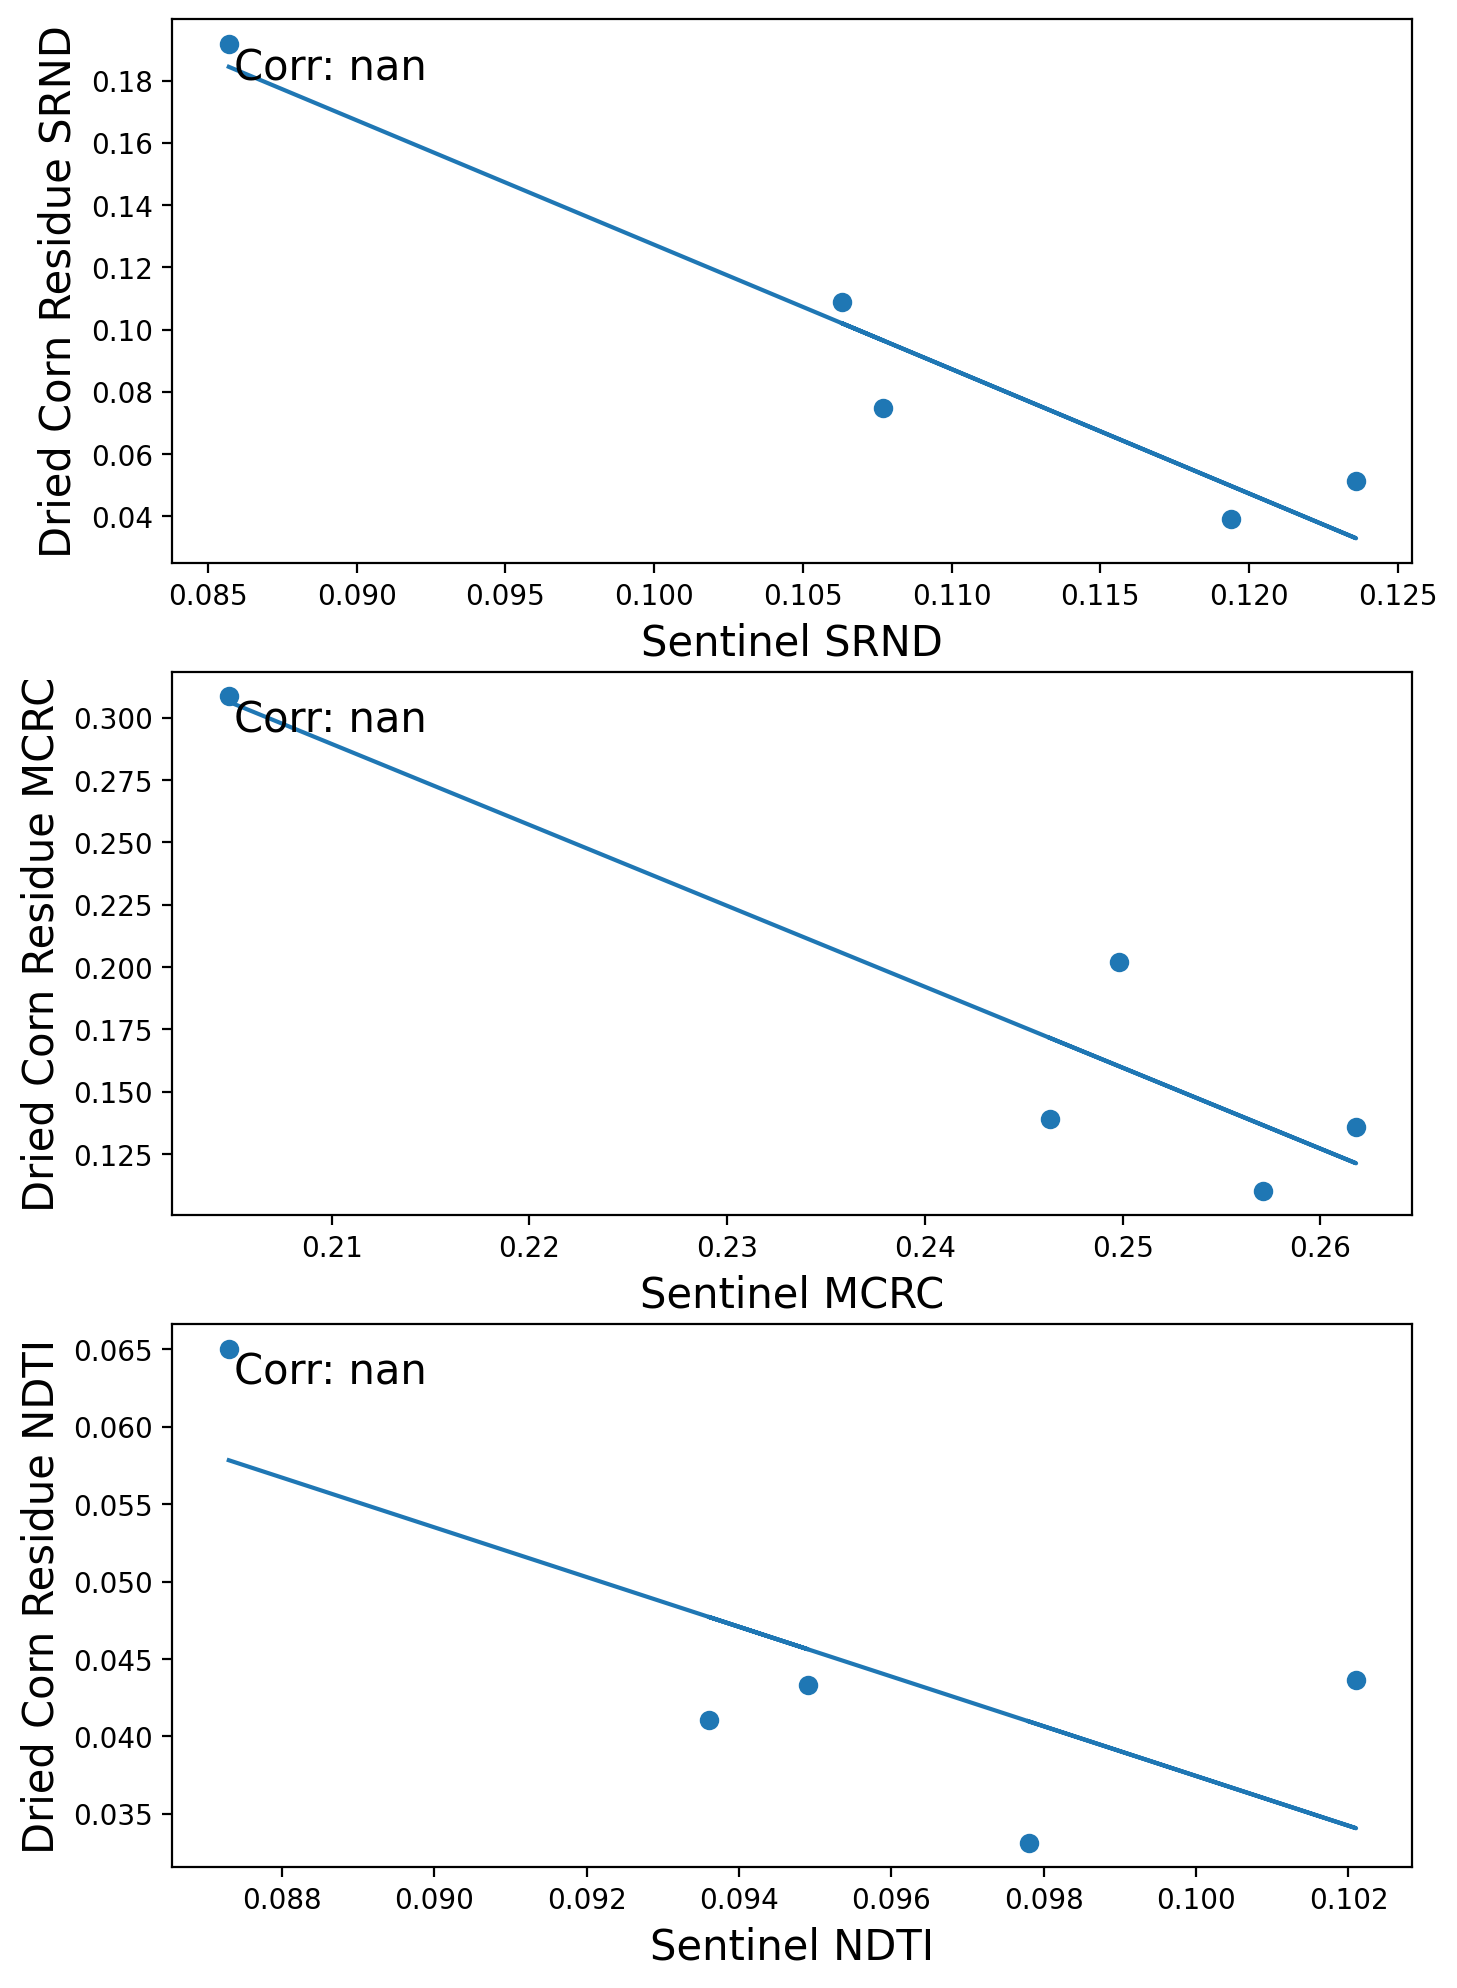

In [ ]:
import numpy as np
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots (3,figsize = (8,12))
ax[0].scatter(Sentinel_SRND,LynnRes_SRND)
ax[0].set_ylabel ("Dried Corn Residue SRND", fontsize = 15)
ax[0].set_xlabel ("Sentinel SRND", fontsize = 15)
z = np.polyfit( Sentinel_SRND, LynnRes_SRND,1)
p = np.poly1d(z)
ax[0].plot(Sentinel_SRND, p(Sentinel_SRND) )

text = "Corr: " + str(round((Sentinel_SRND).corr(LynnRes_SRND),3))
ax[0].text(0.05, 0.95, text, transform=ax[0].transAxes,
     fontsize=15, verticalalignment='top')



ax[1].scatter(sentinel_MCRC,LynnRes_MCRC)
ax[1].set_ylabel ("Dried Corn Residue MCRC", fontsize = 15)
ax[1].set_xlabel ("Sentinel MCRC", fontsize = 15)
z = np.polyfit(sentinel_MCRC,LynnRes_MCRC, 1)
p = np.poly1d(z)
ax[1].plot(sentinel_MCRC, p(sentinel_MCRC) )
text = "Corr: " + str(round (sentinel_MCRC.corr(LynnRes_MCRC),3))
ax[1].text(0.05, 0.95, text, transform=ax[1].transAxes,
     fontsize=15, verticalalignment='top')

ax[2].scatter( Sentinel_NDTI, LynnRes_NDTI)
ax[2].set_ylabel ("Dried Corn Residue NDTI", fontsize = 15)
ax[2].set_xlabel ("Sentinel NDTI", fontsize = 15)
z = np.polyfit(Sentinel_NDTI,LynnRes_NDTI, 1)
p = np.poly1d(z)
ax[2].plot(Sentinel_NDTI, p(Sentinel_NDTI) )
text = "Corr: " + str( round (Sentinel_NDTI.corr(LynnRes_NDTI), 3))
ax[2].text(0.05, 0.95, text, transform=ax[2].transAxes,
     fontsize=15, verticalalignment='top')


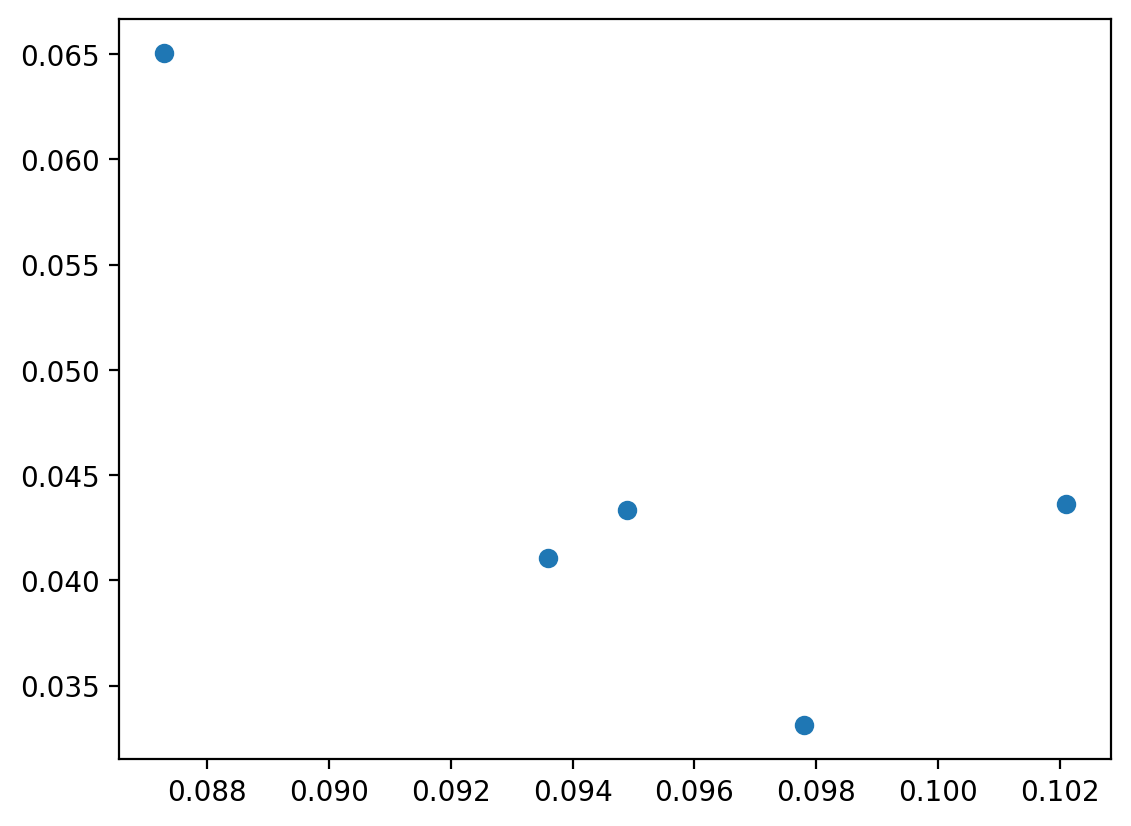

In [ ]:
plt.scatter(Sentinel_NDTI, LynnRes_NDTI)

In [ ]:

def band_conversion (sample):
  B_3 = sentinel['S2A_SR_AV_B3']* sample
  B3 = B_3[B_3!=0 ].mean()
  B_4 = sentinel['S2A_SR_AV_B4']* sample
  B4 = B_4[B_4!=0 ].mean()
  B_11 = sentinel['S2A_SR_AV_B11']* sample
  B11 = B_11[B_11!=0 ].mean()
  B_12 = sentinel['S2A_SR_AV_B12']* sample
  B12 = B_12[B_12!=0 ].mean()
  ndti = (B11-B12)/ (B11+B12)
  srnd = (B12-B4)/ (B12+B4)
  mcrc = (B11-B3)/ (B11+B3)
  return ndti, srnd, mcrc



In [ ]:
Lynn5_Corn_s= band_conversion(LynnW_05_CornRes)
Lynn5_Corn_s= band_conversion(LynnW_05_CornRes)
Lynn5_Soil_s = band_conversion(LynnW_05_Soil)
Lynn4_Corn_s= band_conversion(LynnW_04_CornRes)
Lynn4_Soil_s = band_conversion(LynnW_04_Soil)
Lynn3_Corn_s= band_conversion(LynnW_03_CornRes)
Lynn3_Soil_s = band_conversion(LynnW_03_Soil)
Lynn2_Corn_s= band_conversion(LynnW_02_CornRes)
Lynn2_Soil_s= band_conversion(LynnW_02_Soil)
Lynn1_Corn_s= band_conversion(LynnW_01_CornRes)
Lynn1_Soil_s = band_conversion(LynnW_01_Soil)


In [ ]:
print ('Lynn5 Residue: ndti, srnd, mcrc '+ str(Lynn5_Corn_s))
print ('Lynn4 Residue:  ndti, srnd, mcrc '+ str(Lynn4_Corn_s))
print ('Lynn3 Residue: ndti, srnd, mcrc '+ str(Lynn3_Corn_s))
print ('Lynn2 Residue: ndti, srnd, mcrc '+ str(Lynn2_Corn_s))
print ('Lynn1 Residue: ndti, srnd, mcrc '+ str(Lynn1_Corn_s))

Lynn5 Residue: ndti, srnd, mcrc (0.08045894532746044, 0.2458396602713629, 0.45535038150946555)
Lynn4 Residue:  ndti, srnd, mcrc (0.07105866977579328, 0.2354276330469939, 0.44325517485720606)
Lynn3 Residue: ndti, srnd, mcrc (0.09493994391615869, 0.15108268210084994, 0.4025330054090964)
Lynn2 Residue: ndti, srnd, mcrc (0.1377195487468165, 0.16857260621524367, 0.44559465755630456)
Lynn1 Residue: ndti, srnd, mcrc (0.07396017001631497, 0.3079040190417966, 0.4850406055767236)


In [ ]:
print ('Lynn5 Soil: ndti, srnd, mcrc '+ str(Lynn5_Soil_s))
print ('Lynn4 Soil: ndti, srnd, mcrc '+ str(Lynn4_Soil_s))
print ('Lynn3 Soil: ndti, srnd, mcrc '+ str(Lynn3_Soil_s))
print ('Lynn2 Soil: ndti, srnd, mcrc '+ str(Lynn2_Soil_s))
print ('Lynn1 Soil: ndti, srnd, mcrc '+ str(Lynn1_Soil_s))

Lynn5 Soil: ndti, srnd, mcrc (0.09354301346403693, 0.22036731638378015, 0.4421584792834995)
Lynn4 Soil: ndti, srnd, mcrc (0.11696078799461461, 0.17278218945353208, 0.42015006316519976)
Lynn3 Soil: ndti, srnd, mcrc (0.05376497666135262, 0.21889130372532462, 0.4108997436385828)
Lynn2 Soil: ndti, srnd, mcrc (0.1246148459033829, 0.14985082160610744, 0.4017729612107807)
Lynn1 Soil: ndti, srnd, mcrc (0.06190019019017293, 0.29422788383927456, 0.4551520331231384)


In [ ]:
def tillage_indices(pixel):
  B3 = pixel[180:241].mean()
  B4 = pixel[285:346].mean()
  B11= pixel[1101:1282].mean()
  B12= pixel[1452:1801].mean()
  ndti = (B11- B12)/ (B11+B12)
  srnd = (B12-B4)/ (B12+ B4)
  mcrc = (B11-B3)/ (B11+B3)
  return ndti, srnd, mcrc




In [ ]:
Lynn5_Corn= tillage_indices(LynnW_05_CornRes)
Lynn5_Soil = tillage_indices(LynnW_05_Soil)
Lynn4_Corn= tillage_indices(LynnW_04_CornRes)
Lynn4_Soil = tillage_indices(LynnW_04_Soil)
Lynn3_Corn= tillage_indices(LynnW_03_CornRes)
Lynn3_Soil = tillage_indices(LynnW_03_Soil)
Lynn2_Corn= tillage_indices(LynnW_02_CornRes)
Lynn2_Soil = tillage_indices(LynnW_02_Soil)
Lynn1_Corn= tillage_indices(LynnW_01_CornRes)
Lynn1_Soil = tillage_indices(LynnW_01_Soil)

In [ ]:
print ('Lynn5 Residue: ndti, srnd, mcrc '+ str(Lynn5_Corn))
print ('Lynn4 Residue:  ndti, srnd, mcrc '+ str(Lynn4_Corn))
print ('Lynn3 Residue: ndti, srnd, mcrc '+ str(Lynn3_Corn))
print ('Lynn2 Residue: ndti, srnd, mcrc '+ str(Lynn2_Corn))
print ('Lynn1 Residue: ndti, srnd, mcrc '+ str(Lynn1_Corn))

Lynn5 Residue: ndti, srnd, mcrc (0.12955387293196982, 0.2731118232760684, 0.48980739077145236)
Lynn4 Residue:  ndti, srnd, mcrc (0.1141271751552891, 0.2723982811469368, 0.48163622684499136)
Lynn3 Residue: ndti, srnd, mcrc (0.1443629075891995, 0.17980993798674813, 0.43892651474074557)
Lynn2 Residue: ndti, srnd, mcrc (0.1888053882178571, 0.19339161312934405, 0.4798542091498434)
Lynn1 Residue: ndti, srnd, mcrc (0.12260045284546518, 0.3375047674278174, 0.5208061483176801)


In [ ]:
print ('Lynn5 Soil: ndti, srnd, mcrc '+ str(Lynn5_Soil))
print ('Lynn4 Soil: ndti, srnd, mcrc '+ str(Lynn4_Soil))
print ('Lynn3 Soil: ndti, srnd, mcrc '+ str(Lynn3_Soil))
print ('Lynn2 Soil: ndti, srnd, mcrc '+ str(Lynn2_Soil))
print ('Lynn1 Soil: ndti, srnd, mcrc '+ str(Lynn1_Soil))

Lynn5 Soil: ndti, srnd, mcrc (0.1454574426310607, 0.24313399425313745, 0.4776038097986442)
Lynn4 Soil: ndti, srnd, mcrc (0.18127417412512792, 0.18113969133787977, 0.4552386153786234)
Lynn3 Soil: ndti, srnd, mcrc (0.11744251505299094, 0.2325263972652846, 0.4484025014013145)
Lynn2 Soil: ndti, srnd, mcrc (0.18569622228737093, 0.1608298497903546, 0.43770553009634333)
Lynn1 Soil: ndti, srnd, mcrc (0.12195494643897023, 0.3111939930524, 0.4927830096075265)


In [ ]:
Lynn5_Corn

(0.12955387293196982, 0.2731118232760684, 0.48980739077145236)

In [ ]:
Lynn4_Corn


(0.1141271751552891, 0.2723982811469368, 0.48163622684499136)

In [ ]:
Lynn4_Soil

(0.18127417412512792, 0.18113969133787977, 0.4552386153786234)

In [ ]:
B3 = LynnW_05_CornRes[180:241].mean()
B4 = LynnW_05_CornRes[285:346].mean()
B11= LynnW_05_CornRes[1101:1282].mean()
B12= LynnW_05_CornRes[1452:1801].mean()

In [ ]:
ndti = (B11-B12)/ (B11+B12)
ndti

0.12955387293196982

In [ ]:
srnd = (B12-B4)/ (B12+B4)
srnd

0.2731118232760684

In [ ]:
mcrc = (B11-B3)/ (B11+ B3)
mcrc

0.48980739077145236